# Sinal QAM decomposto e visualizado com pulso formatador de Hanning

In [1]:
from qampy import signals, impairments, equalisation, phaserec, helpers
import numpy as np
from scipy.signal.windows import hann
import matplotlib.pyplot as plt

In [2]:
sig = signals.SignalQAMGrayCoded(64, 2**16, nmodes=1, fb=25e9)

In [3]:
sla = sig.make_decision()
sla = sla.T

In [4]:
sla[0:3]

SignalQAMGrayCoded([[0.46291005-0.15430335j],
                    [0.46291005-0.15430335j],
                    [0.15430335-0.46291005j]])

In [96]:
shape = 150
tempo = np.linspace(0,1,shape)
rotacao = np.exp(-1j*np.pi*15*tempo)
rotacao = np.tile(rotacao,(sla.shape[0],1))
rotacao.shape

(65536, 150)

In [97]:
sig_phase_min = 2*np.exp(1j*np.deg2rad(45)) + sla*rotacao

In [98]:
sig_phase_min.shape

(65536, 150)

In [99]:
pulso_formatador_Q = hann(shape)
pulso_formatador_I = hann(shape)

In [100]:
pulsos_I = np.tile(pulso_formatador_I,(sla.shape[0],1))
pulsos_Q = np.tile(pulso_formatador_Q,(sla.shape[0],1))
pulsos_I_phase_min = pulsos_I*sig_phase_min.real
pulsos_Q_phase_min = pulsos_Q*sig_phase_min.imag

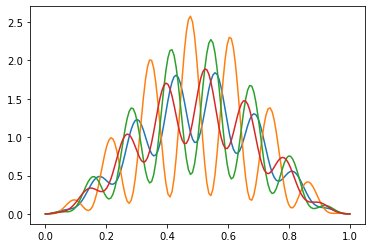

In [101]:
for i in range(4):
    plt.plot(np.linspace(0,1,shape),pulsos_I_phase_min[i])

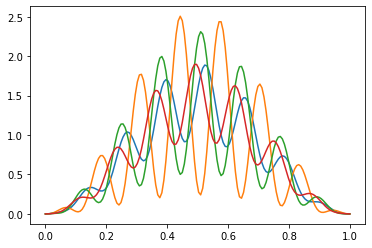

In [102]:
for i in range(4):
    plt.plot(np.linspace(0,1,shape),pulsos_Q_phase_min[i])

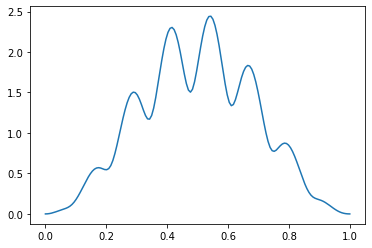

In [104]:
for i in range(1):
    plt.plot(np.linspace(0,1,shape),np.sqrt(pulsos_I_phase_min**2+pulsos_Q_phase_min**2)[i])
    

In [92]:
fft_pulso = np.fft.fftshift(np.fft.fft(pulsos_I_phase_min[0]))
freq = np.fft.fftshift(np.fft.fftfreq(shape))

(-10.0, 10.0)

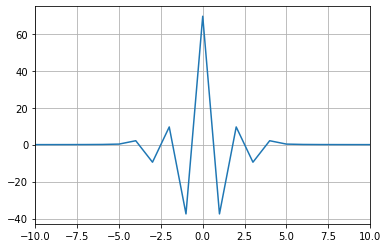

In [94]:
plt.plot(freq*shape,fft_pulso)
plt.grid(True)
plt.xlim([-10,10])

<StemContainer object of 3 artists>

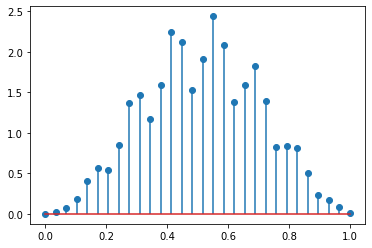

In [106]:
plt.stem(np.linspace(0,1,30),np.sqrt(pulsos_I_phase_min**2+pulsos_Q_phase_min**2)[0,::5])

In [108]:
import pandas as pd

In [109]:
amplitudes = np.sqrt(pulsos_I_phase_min**2+pulsos_Q_phase_min**2)[:,::5]
amplitudes.shape

(65536, 30)

In [139]:
amplitudes = np.sqrt(pulsos_I_phase_min**2+pulsos_Q_phase_min**2)[:,::5]
amplitudes.shape
amplitudes = pd.DataFrame(amplitudes)
amplitudes

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.024988,0.068899,0.178916,0.411013,0.566841,0.546023,0.846349,1.372268,1.468306,...,1.826214,1.389302,0.820974,0.842615,0.817018,0.505316,0.231706,0.166932,0.088321,0.015128
1,0.0,0.029655,0.136470,0.180924,0.175232,0.686236,1.084388,0.824507,0.605769,1.812779,...,0.897064,1.816140,1.630794,0.701198,0.415867,0.672908,0.459020,0.133275,0.046569,0.020517
2,0.0,0.021867,0.050650,0.232814,0.481515,0.490283,0.410607,1.102920,1.598914,1.254938,...,2.091956,1.144033,0.681661,1.100189,0.930410,0.410791,0.197392,0.217879,0.099977,0.012139
3,0.0,0.017449,0.080791,0.237159,0.375975,0.395987,0.651747,1.112722,1.242498,1.026986,...,1.603824,0.980322,1.045145,1.069889,0.710324,0.358255,0.299193,0.210028,0.076020,0.010786
4,0.0,0.014897,0.092748,0.256773,0.348129,0.340781,0.749129,1.200971,1.144344,0.891504,...,1.453258,0.876648,1.204118,1.139741,0.640112,0.323876,0.344705,0.222982,0.068130,0.009862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0.0,0.027107,0.098663,0.151895,0.310702,0.621256,0.781434,0.705981,1.045938,1.625809,...,1.428591,1.585947,1.162200,0.659488,0.644924,0.582680,0.326386,0.128837,0.070360,0.017620
65532,0.0,0.036707,0.095751,0.072059,0.438619,0.837203,0.746321,0.351565,1.483599,2.179977,...,2.048648,2.092831,1.033878,0.406673,0.927291,0.764584,0.284681,0.083803,0.101388,0.022987
65533,0.0,0.014550,0.122971,0.283638,0.260991,0.343421,0.990072,1.318034,0.843641,0.925371,...,1.016658,0.983646,1.569033,1.217265,0.439814,0.371604,0.447451,0.236456,0.045970,0.011549
65534,0.0,0.020257,0.069409,0.219860,0.408493,0.457905,0.558230,1.035853,1.355490,1.182254,...,1.770935,1.109806,0.888625,1.012824,0.787440,0.402879,0.254199,0.199667,0.084603,0.012043


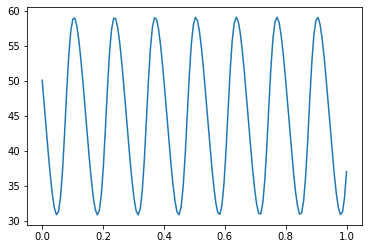

In [117]:
plt.plot(np.linspace(0,1,shape),np.angle(sig_phase_min,deg=True)[0])

In [141]:
angulos = pd.DataFrame(np.angle(sla,deg=True))
angulos

,0
0,71.565051
1,-156.801409
2,30.963757
3,-18.434949
4,-45.000000
...,...
65531,161.565051
65532,125.537678
65533,-81.869898
65534,18.434949


In [142]:
amplitudes.to_pickle("./features.pkl")

In [143]:
angulos.to_pickle("./labels.pkl")